## Charting averages and totals of mapping extent, cross-mapping vs databank-mapping, etc as more routes got done

In [1]:
import pandas as pd
import os

In [2]:
reportFolder = 'reports/'

In [3]:
def findFiles(folder, ext='.csv', prefix=None):
	filenames = [f for f in os.listdir(folder) 
		if f.lower().endswith(ext) 
		and ( checkPrefix(f,prefix) ) 
		and os.path.isfile(os.path.join(folder, f))]
	return filenames

def checkPrefix(f,prefix):
	if not prefix: return True
	return f.lower().startswith(prefix)


In [4]:
summaryReports = findFiles(reportFolder, ext='.csv', prefix='report_bulkmapping_summary')
summaryReports.sort()
summaryReports

['report_bulkmapping_summary2018-10-28-1925.csv',
 'report_bulkmapping_summary2018-10-28-1942.csv',
 'report_bulkmapping_summary2018-10-28-1958.csv',
 'report_bulkmapping_summary2018-10-28-2008.csv',
 'report_bulkmapping_summary2018-10-28-2024.csv',
 'report_bulkmapping_summary2018-10-28-2039.csv',
 'report_bulkmapping_summary2018-10-28-2048.csv',
 'report_bulkmapping_summary2018-10-28-2102.csv',
 'report_bulkmapping_summary2018-10-28-2114.csv',
 'report_bulkmapping_summary2018-10-28-2122.csv',
 'report_bulkmapping_summary2018-10-31-1409.csv',
 'report_bulkmapping_summary2018-11-02-0826.csv']

In [5]:
pd.read_csv(reportFolder + 'report_bulkmapping_summary2018-11-02-0826.csv', index_col=0)

average  median   min    max  std_deviation      sum
parameter                                                                  
url_matches              22.23    14.0   0.0  106.0          20.49  16340.0
name_matches              8.45     7.0   0.0   32.0           6.55   6208.0
databank_matches         32.87    31.0   0.0  105.0          18.76  24157.0
faraway_removed           0.77     0.0   0.0    5.0           0.96    569.0
unmapped                 14.18    13.0   0.0   51.0           8.29  10419.0
crossmapping_coverage    37.78    33.3   0.0  100.0          23.06      NaN
databank_coverage        44.18    46.9   0.0   87.8          18.46      NaN
coverage                 81.00    81.2  50.0  100.0           8.42      NaN

In [6]:
avgDict = {}
sumDict = {}
for f in summaryReports:
    header = f[31:-4]
    print(header)
    avgDict[header] = pd.read_csv(reportFolder + f, index_col=0).average
    sumDict[header] = pd.read_csv(reportFolder + f, index_col=0)['sum']

10-28-1925
10-28-1942
10-28-1958
10-28-2008
10-28-2024
10-28-2039
10-28-2048
10-28-2102
10-28-2114
10-28-2122
10-31-1409
11-02-0826


In [7]:
avgDF = pd.DataFrame(avgDict).transpose()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e630b92e8>,
      dtype=object)

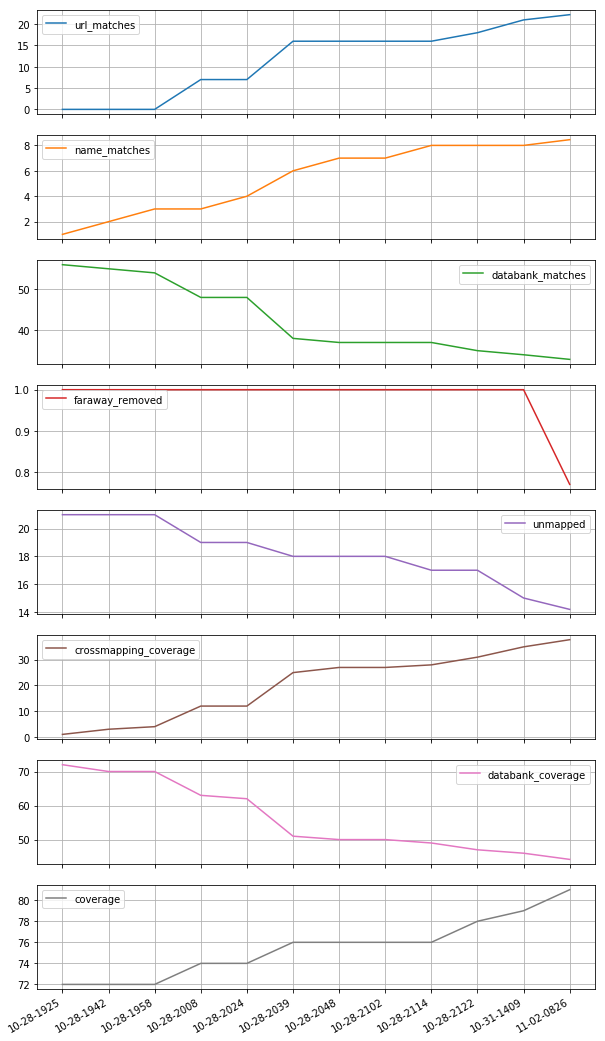

In [12]:
avgDF.plot(kind='line', subplots=True, figsize=(10,20), grid=True, xticks = range(len(summaryReports)))

above figures shows averages after bulk mapping as completed routes were added 

In [9]:
'#'*100

'####################################################################################################'

In [10]:
sumDF = pd.DataFrame(sumDict).transpose()
sumDF.iloc[:,list(range(5))]


parameter   url_matches  name_matches  databank_matches  faraway_removed  \
10-28-1925        351.0         410.0           41831.0            727.0   
10-28-1942        351.0        1611.0           40619.0            727.0   
10-28-1958        351.0        1940.0           40294.0            727.0   
10-28-2008       5132.0        2563.0           35753.0            607.0   
10-28-2024       5132.0        2857.0           35437.0            605.0   
10-28-2039      11902.0        4295.0           28401.0            627.0   
10-28-2048      11861.0        5092.0           27542.0            625.0   
10-28-2102      11779.0        5197.0           27386.0            625.0   
10-28-2114      11778.0        5744.0           27048.0            640.0   
10-28-2122      13508.0        5811.0           25898.0            640.0   
10-31-1409      15209.0        5886.0           25157.0            805.0   
11-02-0826      16340.0        6208.0           24157.0            569.0   

parameter   unmapped  
10-28-1925   15673.0  
10-28-1942   15575.0  
10-28-1958   15535.0  
10-28-2008   14464.0  
10-28-2024   14453.0  
10-28-2039   13168.0  
10-28-2048   13155.0  
10-28-2102   13146.0  
10-28-2114   12884.0  
10-28-2122   12162.0  
10-31-1409   11196.0  
11-02-0826   10419.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e63738cf8>,
      dtype=object)

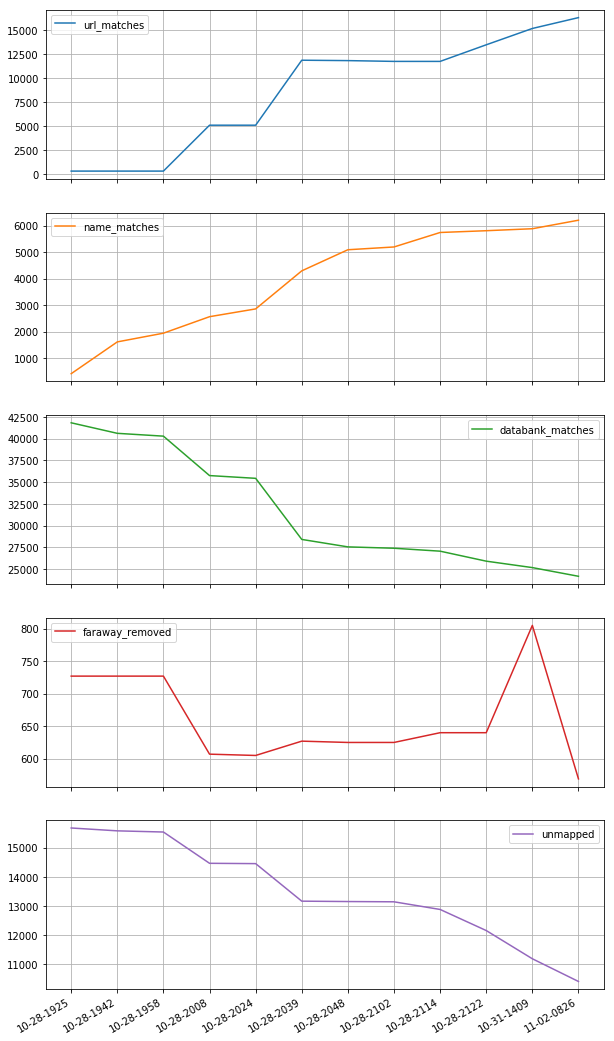

In [11]:
sumDF.iloc[:,list(range(5))].plot(kind='line', subplots=True, figsize=(10,20), grid=True, xticks = range(len(summaryReports)))

above figs: totals of all bulkmapped routes, as done routes were added